In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
print(cancer.target_names)

['malignant' 'benign']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Visualization**

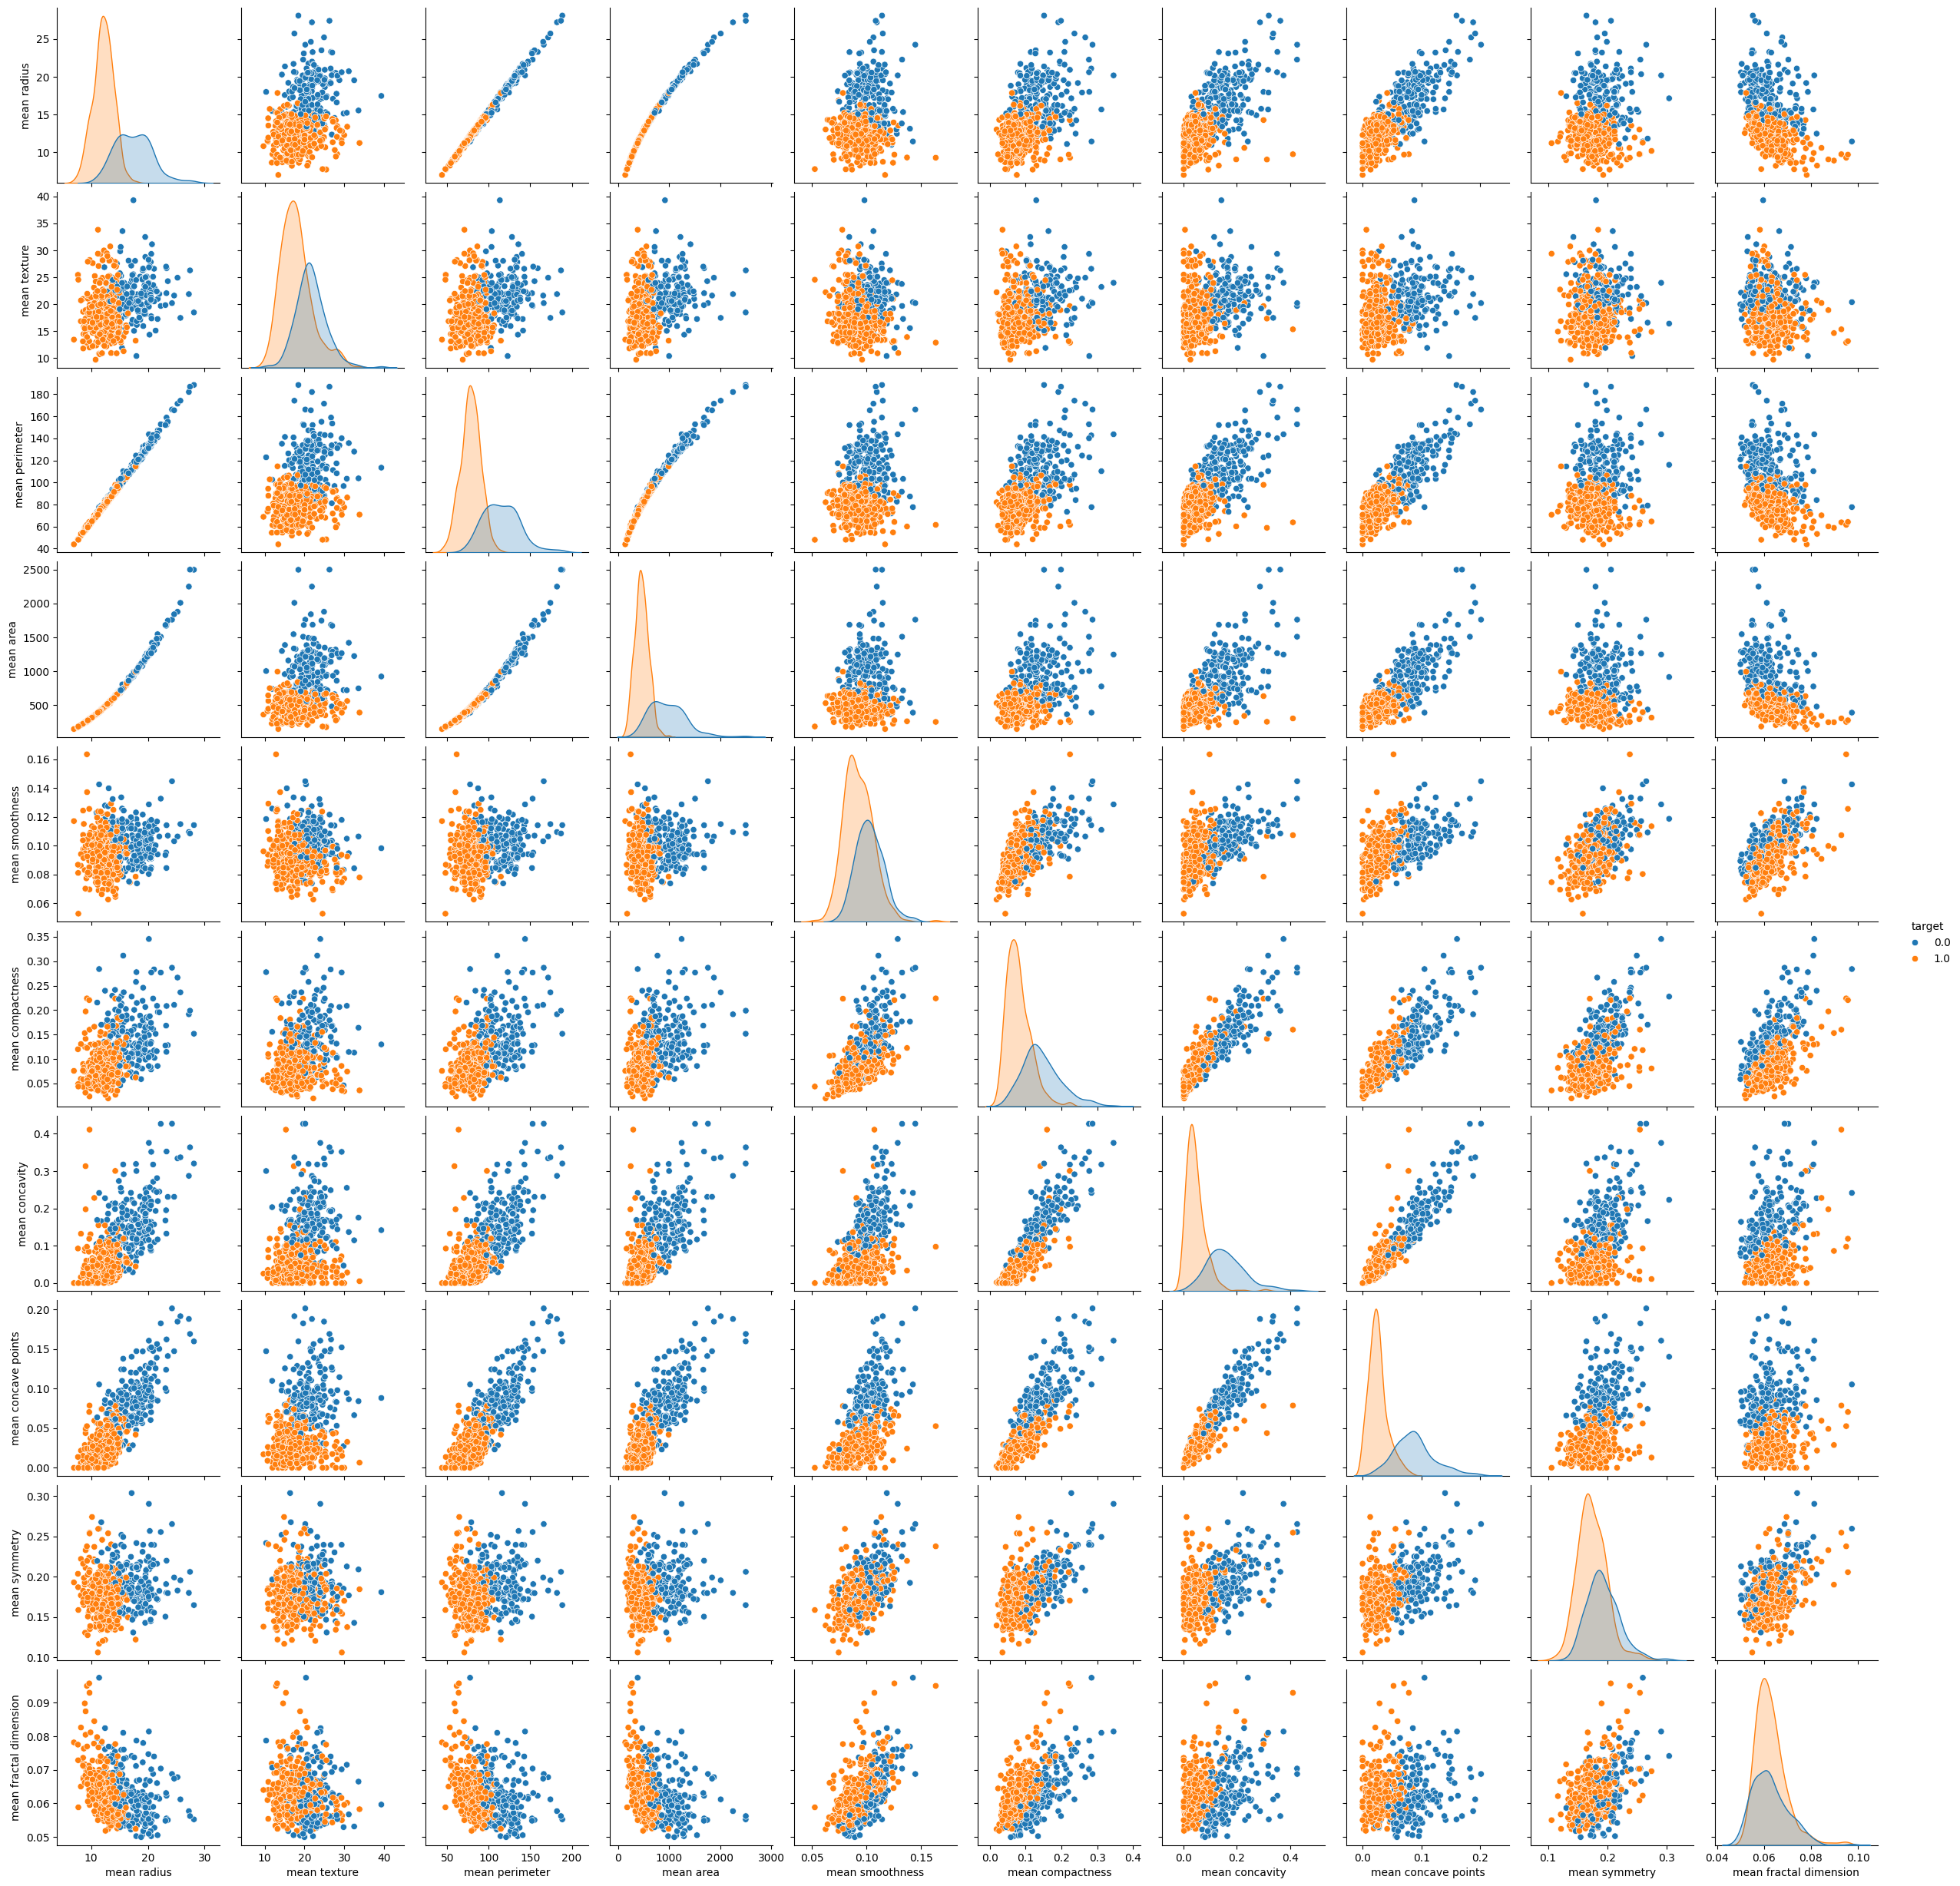

In [6]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension'])

<Axes: xlabel='target', ylabel='count'>

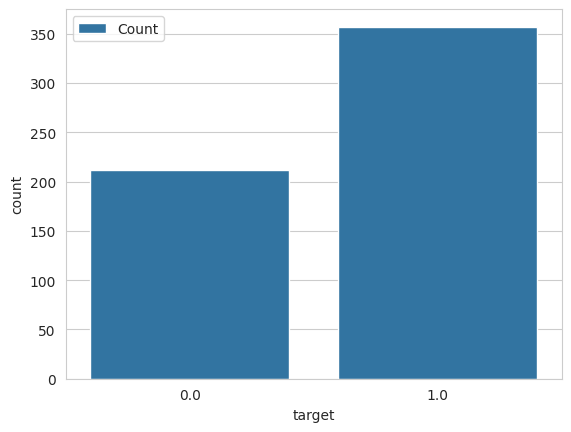

In [9]:
sns.countplot(x=df['target'], label = "Count")

<Axes: xlabel='mean area', ylabel='mean smoothness'>

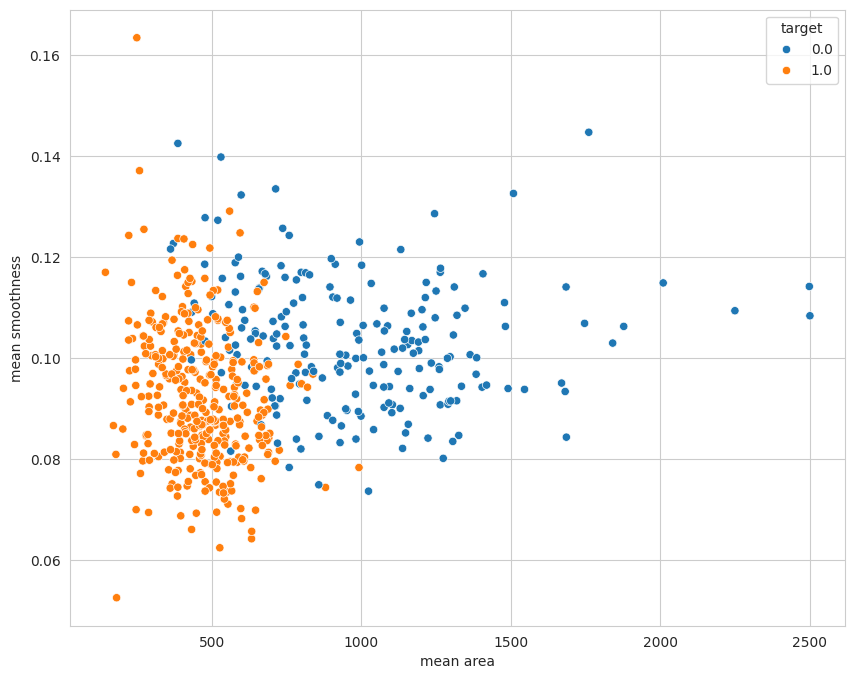

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

In [11]:
X = df.drop('target', axis=1)
y = df.target


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [14]:
cols = X_train.columns

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [16]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [17]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [18]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-9.135549e-16,-3.341893e-15,3.216963e-15,-2.201902e-15,-1.456222e-15,5.348591e-16,6.871182e-16,4.450652e-16,-5.669702e-15,6.715019e-16,...,-4.841060e-16,4.841060e-16,-1.460126e-15,1.249306e-16,5.936155e-15,-3.708877e-16,-1.358620e-15,2.654775e-16,-2.137484e-15,1.989129e-15
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.019404e+00,-2.272988e+00,-1.977589e+00,-1.426379e+00,-3.176344e+00,-1.664312e+00,-1.125696e+00,-1.262871e+00,-2.738225e+00,-1.865718e+00,...,-1.704360e+00,-2.218398e+00,-1.673608e+00,-1.188201e+00,-2.711807e+00,-1.468356e+00,-1.341360e+00,-1.754014e+00,-2.128278e+00,-1.598903e+00
25%,-6.873871e-01,-7.420774e-01,-6.883840e-01,-6.577342e-01,-7.082998e-01,-7.367713e-01,-7.403181e-01,-7.254573e-01,-6.975035e-01,-7.022156e-01,...,-6.624319e-01,-7.439783e-01,-6.767688e-01,-6.257607e-01,-7.105576e-01,-6.807320e-01,-7.569093e-01,-7.585201e-01,-6.518526e-01,-6.814765e-01
50%,-2.357361e-01,-9.697672e-02,-2.403944e-01,-3.131017e-01,-3.433938e-02,-2.188714e-01,-3.517235e-01,-3.963173e-01,-6.354630e-02,-1.656097e-01,...,-2.878293e-01,-5.394673e-02,-2.932556e-01,-3.516681e-01,-3.801757e-02,-2.619431e-01,-1.970300e-01,-2.427267e-01,-1.416994e-01,-2.181271e-01
75%,4.551909e-01,5.866375e-01,4.871769e-01,3.009759e-01,6.519540e-01,5.151506e-01,4.775784e-01,6.589276e-01,5.320447e-01,4.590848e-01,...,4.409060e-01,6.229571e-01,5.074669e-01,2.583182e-01,5.659411e-01,5.435962e-01,5.549081e-01,7.103914e-01,4.542741e-01,4.568064e-01
max,3.963628e+00,3.528104e+00,3.980919e+00,5.163006e+00,3.503046e+00,4.125777e+00,4.366097e+00,3.955644e+00,4.496561e+00,5.105021e+00,...,4.049783e+00,3.938555e+00,4.261315e+00,5.758096e+00,3.988374e+00,5.270909e+00,4.936910e+00,2.695096e+00,5.934052e+00,6.968987e+00


In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()

svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9825


In [20]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9474


In [21]:
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9474


In [23]:
linear_svc=SVC(kernel='linear', C=1.0)

# fit classifier to training set
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9825


In [24]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1.

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9890


In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9890
Test set score: 0.9825


no overfitting

**polynomial**

In [27]:
poly_svc=SVC(kernel='poly', C=1.0)

# fit classifier to training set
poly_svc.fit(X_train,y_train)

y_pred=poly_svc.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9035


**sigmoid**

In [28]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)

sigmoid_svc.fit(X_train,y_train)

y_pred=sigmoid_svc.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9123


In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[46  1]
 [ 1 66]]

True Positives(TP) =  46

True Negatives(TN) =  66

False Positives(FP) =  1

False Negatives(FN) =  1


<Axes: >

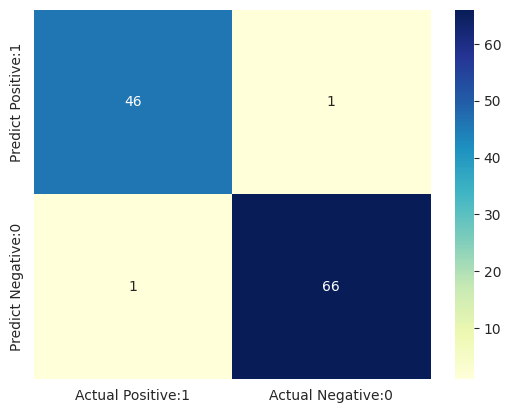

In [30]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        47
         1.0       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
scaler = StandardScaler()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

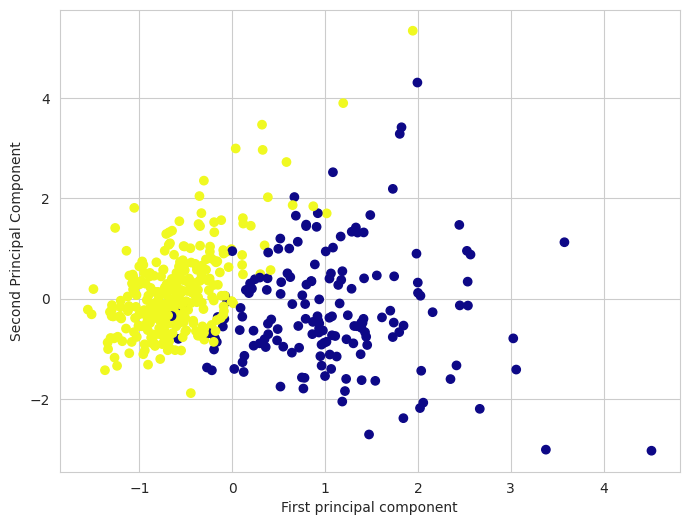

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')